# CAP 2751 - Tools for Data Science
***Include the following info by clicking here:***
* Name: Jasmin Spanioli
* Canvas Course Section: CAP2751-1
* Date: 6/8/25
* Link to your Notebook: https://colab.research.google.com/drive/1RohWS7Ii28l9oC9GmVqOi-D81o-QoBtt?usp=sharing


# Assignment 1: Exploratory Data Analysis (EDA)
## STARTER

### Goals

- To acquire a basic understanding of the Python "data science stack" (NumPy, Pandas, Matplotlib).
- To have an early experience of manipulating, summarizing, and visualizing small datasets.
- To demonstrate the ability to write Python code to answer questions and test hypotheses based on the contents of those datasets.


### Instructions

- This assignment is structured in two parts.
- For each part, there will be some Python code to be written and questions to be answered.
- At the end, you should export your notebook to PDF format; it will "automagically" become your report.
- Submit the report (PDF), notebook (.ipynb file), and the link to the "live" version of your solution on Google Colaboratory via Canvas.
- The number of points is indicated next to each part. They add up to 100.
- There are additional (20 points worth of) bonus items, which are, of course optional.

### Important

- It is OK to attempt the bonus points, but please **do not overdo it!**
- Remember: this is an early exercise in exploring datasets; learning the syntax and "tricks" of Python, Jupyter notebooks, Numpy, Pandas, and Matplotlib; and writing code to test simple hypotheses and produce answers to simple questions that **you know you should be able to answer** because the answer can be pulled from the data.
- This is not (yet) the time to do sophisticated statistical analysis, train ML models, etc.

---------
### Imports + Google Drive

In [1]:
# Imports
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from __future__ import division
import seaborn as sns
sns.set(style='ticks', palette='Set2')
%matplotlib inline

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


-------------------
## Part 1: Salaries

The Python code below will load a dataset containing the salaries and demographic data of more than 1000 employees of a hypothetical company, available in the file *salaries.csv*, which is a simple comma-separated list of labels and values.

In [3]:
salaries = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/salaries.csv')
#salaries = pd.read_csv('./data/salaries.csv')
print(salaries.shape)
print(salaries.count())

(1192, 6)
earn      1192
height    1192
sex       1192
ed        1192
age       1192
race      1192
dtype: int64


### 1.1 Your turn! (2 points)

What is the meaning of each of the six variables/features stored along the columns of the dataset?

Hint: Your solution should have a code cell (2-3 lines of Python) + a text cell (bullet list, explaining the meaning of each variable _to the best of your knowledge_)

In [9]:
# Enter your code here
salaries.head()

,earn,height,sex,ed,age,race
0,50000.0,74.424439,male,16,45,white
1,60000.0,65.537543,female,16,58,white
2,30000.0,63.629198,female,16,29,white
3,50000.0,63.108562,female,16,91,other
4,51000.0,63.402484,female,17,39,white


In [44]:
# Enter your code
# inspired by ----- https://github.com/fau-masters-collected-works-cgarbin/ieee-icmla-2019-data-science-tutorial/blob/master/experiments/test-salaries.ipynb
print(salaries.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1192 entries, 0 to 1191
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   earn    1192 non-null   float64
 1   height  1192 non-null   float64
 2   sex     1192 non-null   object 
 3   ed      1192 non-null   int64  
 4   age     1192 non-null   int64  
 5   race    1192 non-null   object 
dtypes: float64(2), int64(2), object(2)
memory usage: 56.0+ KB
None


In [45]:
print(salaries.describe)

<bound method NDFrame.describe of          earn     height     sex  ed  age   race
0     50000.0  74.424439    male  16   45  white
1     60000.0  65.537543  female  16   58  white
2     30000.0  63.629198  female  16   29  white
3     50000.0  63.108562  female  16   91  other
4     51000.0  63.402484  female  17   39  white
...       ...        ...     ...  ..  ...    ...
1187  19000.0  72.165733    male  12   29  white
1188  15000.0  61.135800  female  18   82  white
1189   8000.0  63.664164  female  12   33  white
1190  60000.0  71.925836    male  12   50  white
1191   6000.0  68.368486    male  12   27  white

[1192 rows x 6 columns]>


*Enter your text here*

*   earn = salary (presumably annual, in USD)
*   height = height (inches)
*   sex = sex (gender, male or female)
*   ed = ed (years of schooling)
*   age = age (years of age)
*   race = race (ethnicity)





--------------------
### Summary statistics and correlations

Let's explore the dataset by plotting some graphs and displaying summary statistics.

The code below should display:
- Min, max, average, and median salary (global)
- A histogram of salaries
- A scatterplot correlating salaries and years of education
- The (Pearson) correlation coefficient between the two variables.

This should help us get started.

In [17]:
salary = np.array(salaries['earn'])
print("--- Salary statistics ---")
print("Minimum salary (global): ${:6.2f}".format(np.min(salary)))
print("Maximum salary (global): ${:6.2f}".format(np.max(salary)))
print("Average salary (global): ${:6.2f}".format(np.mean(salary)))
print("Median  salary (global): ${:6.2f}".format(np.median(salary)))

--- Salary statistics ---
Minimum salary (global): $200.00
Maximum salary (global): $200000.00
Average salary (global): $23154.77
Median  salary (global): $20000.00


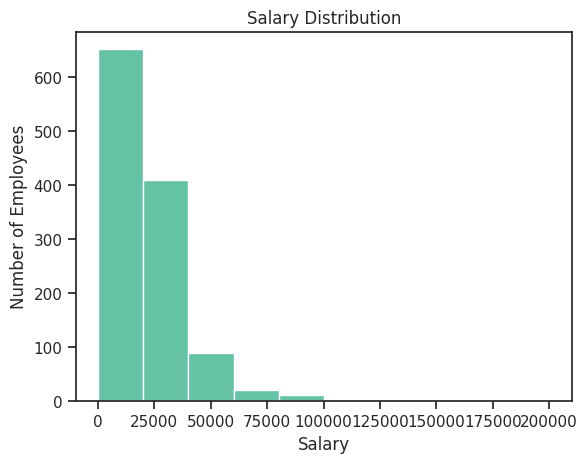

In [18]:
plt.hist(salary)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Number of Employees');

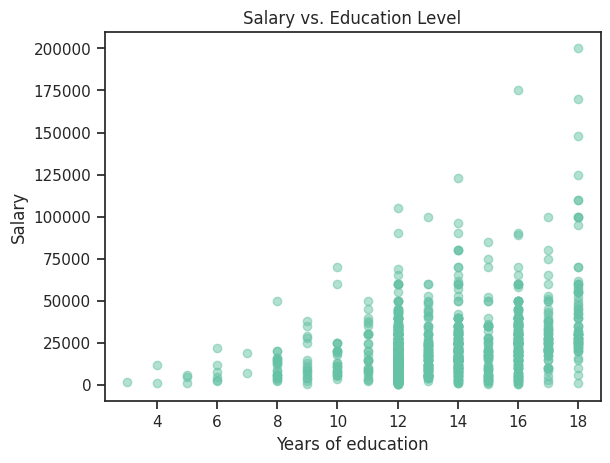

In [19]:
years = np.array(salaries['ed'])
plt.title('Salary vs. Education Level')
plt.ylabel('Salary')
plt.xlabel('Years of education');
plt.scatter(years, salary, alpha=0.5)
plt.show()

In [20]:
# Compute Pearson coefficient
corr, _ = pearsonr(salary,years)
print('Correlation coefficient: ',corr)

Correlation coefficient:  0.3399765246894845


The Pearson correlation coefficient (a value between -1 and 1) can be used to summarize the strength of the linear relationship between two data samples.

A simplified way to interpret the result is:
- A value of 0 means no correlation
- Values below -0.5 or above 0.5 indicates a notable (negative/positive) correlation

### 1.2 Your turn! (10-14 points)

Write code to:

1. Display the total headcount and the number (and %) of male and female employees. (2 pts)
2. Compute and display the min, max, average, and median salary *per gender*. (8 pts)
3. (OPTIONAL) Plot meaningful graphs that could provide insight into the gender inequality (*if any is present*) associated with the salaries in the company. (<= 4 bonus points)


In [38]:
# 1. Count total and by gender
gender = np.array(salaries['sex'])
gender = np.array(salaries['sex'])
print("--- Gender Statistics ---")
print("Total Employees:", len(gender))
print("Gender   Count   Percentage")

# Get counts and percentages
genderCounts = salaries['sex'].value_counts()
genderPercentages = salaries['sex'].value_counts(normalize=True) * 100

# Print male and female employees
print("male     ", genderCounts['male'], "   ", round(genderPercentages['male'], 2), "%")
print("female   ", genderCounts['female'], "   ", round(genderPercentages['female'], 2), "%")

# 2. Compute the min, max, avg, & median salary per gender

# Male salaries
maleSalaries = salaries[salaries['sex'] == 'male']['earn']

print("--- Salary statistics for males ---")
print("Minimum salary: ${:.2f}".format(np.min(maleSalaries)))
print("Maximum salary: ${:.2f}".format(np.max(maleSalaries)))
print("Average salary: ${:.2f}".format(np.mean(maleSalaries)))
print("Median  salary: ${:.2f}".format(np.median(maleSalaries)))

# Female salaries
femaleSalaries = salaries[salaries['sex'] == 'female']['earn']

print("\n--- Salary statistics for females ---")
print("Minimum salary: ${:.2f}".format(np.min(femaleSalaries)))
print("Maximum salary: ${:.2f}".format(np.max(femaleSalaries)))
print("Average salary: ${:.2f}".format(np.mean(femaleSalaries)))
print("Median  salary: ${:.2f}".format(np.median(femaleSalaries)))


--- Gender Statistics ---
Total Employees: 1192
Gender   Count   Percentage
male      505     42.37 %
female    687     57.63 %
--- Salary statistics for males ---
Minimum salary: $1000.00
Maximum salary: $200000.00
Average salary: $29786.13
Median  salary: $25000.00

--- Salary statistics for females ---
Minimum salary: $200.00
Maximum salary: $123000.00
Average salary: $18280.20
Median  salary: $15000.00


*Enter your text here*

--------------------
### Signs of inequality

As you can possibly tell by now, this dataset may help us test hypotheses and answer questions related to possible sources of inequality associated with the salary distribution: gender, age, race, etc..

Let's assume, for the sake of argument, that the number of years of education should correlate well with a person's salary (this is clearly a weak argument and the plot and Pearson correlation coefficient computation above suggests that this is *not* the case) and that other suspiciously high (positive or negative) correlations could be interpreted as a sign of inequality.

---------------------
### Hypotheses H1, H2, H3
At this point, we will formulate 3 different hypotheses that might suggest that the salary distribution is biased by factors such as age, gender, or race:

- H1: Older employees are paid less (i.e., ageism)
- H2: Female employees are paid less (i.e., gender bias)
- H3: Non-whites are paid less (i.e, race bias).

### 1.3 Your turn! (18-26 points)

Write Python code to test hypotheses H1, H2, and H3 (and some text to explain whether they were confirmed or not).

Feel free to (also) use plots, but make your code independent of a human being interpreting those plots.

**Weight**: 18 pts, i.e., 6 pts per hypothesis.
Up to 8 bonus points for insightful additional hypotheses, code, and/or comments.  

H1:

In [48]:
# H1: Older employees are paid less
# Get age and salary data
age = salaries['age']
salary = salaries['earn']

# Calculate correlation between age and salary
correlation, _ = pearsonr(age, salary)

# Print result
if correlation < 0:
    print("This might support H1")
else:
    print("This does not support H1")


This does not support H1


H2:

In [52]:
# H2: Female employees are paid less
# Get salary data by gender
maleSalaries = salaries[salaries['sex'] == 'male']['earn']
femaleSalaries = salaries[salaries['sex'] == 'female']['earn']

# Calculate averages
avgMale = maleSalaries.mean()
avgFemale = femaleSalaries.mean()

print("H2 - Average Salary by Gender")

# Print results
if avgFemale < avgMale:
    print("This might support H2.")
else:
    print("This does not support H2.")


H2 - Average Salary by Gender
This might support H2 — females are paid less on average.


H3:

In [53]:
# H3: Non-white employees are paid less
# Separate salary data
whiteSalaries = salaries[salaries['race'] == 'white']['earn']
nonWhiteSalaries = salaries[salaries['race'] != 'white']['earn']

# Calculate averages
avgWhite = whiteSalaries.mean()
avgNonWhite = nonWhiteSalaries.mean()

# Display results
print("H3 - Average Salary by Race Group")

# Print results
if avgNonWhite < avgWhite:
    print("This might support H3.")
else:
    print("This does not support H3.")


H3 - Average Salary by Race Group
This might support H3.


-------------------
## Part 2: Fuel consumption

The Python code below will load a dataset containing fuel consumption data for ~400 vehicles produced in the 1970s and the 1980s along with some characteristic information associated with each model.

Here, *displacement* refers to a vehicle's engine size and the fuel efficiency is measured in miles per gallon (mpg).

See:
https://archive.ics.uci.edu/ml/datasets/Auto+MPG for additional information.

In [57]:
data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original",
                   delim_whitespace = True, header=None,
                   names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
                            'model', 'origin', 'car_name'])
print(data.shape)

(406, 9)


<ipython-input-57-4a6d48b4152a>:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original",


In [58]:
data.dropna(inplace=True)
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


### 2.1 Your turn! (10-12 points)

Write code to:

1. Count the number of 3- and 5-cylinder vehicles in the dataset, display the count, and discard those entries (rows). (6 pts)
2. Compute and display the min, max, and average fuel consumption (in mpg) for 4-, 6-, and 8-cylinder vehicles. (4 pts)
3. (OPTIONAL) Display the name of the most and least fuel efficient vehicles in the dataset (<= 2 points)


In [63]:
# Filter and remove 3- and 5-cylinder vehicles
three=(data.loc[data['cylinders'] == 3.0])
five=(data.loc[data['cylinders'] == 5.0])
frames = [three, five]
bad = pd.concat(frames)
data.sort_values(by=['cylinders'], inplace=True)


In [64]:
print("There were", len(bad), "vehicles with 3.0 or 5.0 cylinders removed")

There were 0 vehicles with 3.0 or 5.0 cylinders removed


In [67]:
print("--- EPA statistics ---")
# For 4-cylinder Vehicles
print("4-cylinder Vehicles")
print("Minimum fuel consumption (in mpg) : ",(np.min(data['mpg'][data['cylinders']==4.0])))
print("Maximum fuel consumption (in mpg) : ",(np.max(data['mpg'][data['cylinders']==4.0])))
print("Average fuel consumption (in mpg):", (np.average(data['mpg'][data['cylinders']==4.0])))

# For 6-cylinder Vehicles
print()
print("6-cylinder Vehicles")
print("Minimum fuel consumption (in mpg) : ",(np.min(data['mpg'][data['cylinders']==6.0])))
print("Maximum fuel consumption (in mpg) : ",(np.max(data['mpg'][data['cylinders']==6.0])))
print("Average fuel consumption (in mpg):", (np.average(data['mpg'][data['cylinders']==6.0])))


# For 8-cylinder Vehicles
print()
print("8-cylinder Vehicles")
print("Minimum fuel consumption (in mpg) : ",(np.min(data['mpg'][data['cylinders']==8.0])))
print("Maximum fuel consumption (in mpg) : ",(np.max(data['mpg'][data['cylinders']==8.0])))
print("Average fuel consumption (in mpg):", (np.average(data['mpg'][data['cylinders']==8.0])))

--- EPA statistics ---
4-cylinder Vehicles
Minimum fuel consumption (in mpg) :  18.0
Maximum fuel consumption (in mpg) :  46.6
Average fuel consumption (in mpg): 29.28391959798995

6-cylinder Vehicles
Minimum fuel consumption (in mpg) :  15.0
Maximum fuel consumption (in mpg) :  38.0
Average fuel consumption (in mpg): 19.973493975903615

8-cylinder Vehicles
Minimum fuel consumption (in mpg) :  9.0
Maximum fuel consumption (in mpg) :  26.6
Average fuel consumption (in mpg): 14.963106796116502


*Enter your text here*

--------------------
### Hypotheses and questions

This dataset may help us test hypotheses and answer questions related to fuel consumption.

To get started: Which features of a vehicle correlate best with its mpg --  *displacement*, *weight*, or *horsepower*?

### 2.2. Your turn! (24 points)

Write Python code to plot the relationship between (8 pts each):

1. Fuel consumption and displacement (engine size)
2. Fuel consumption and weight
3. Fuel consumption and horsepower (HP)


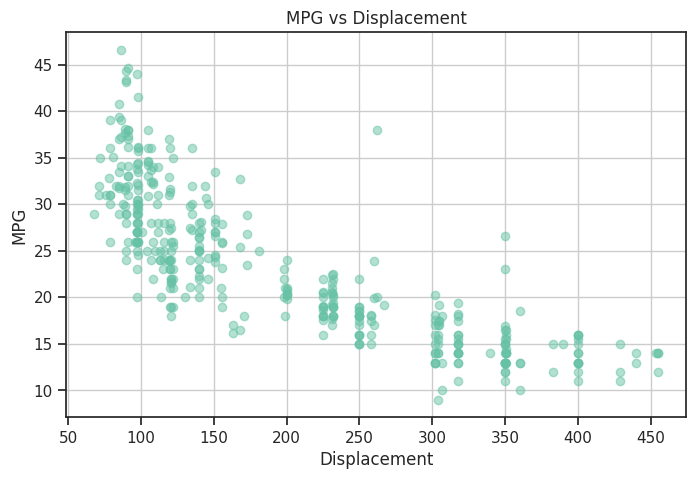

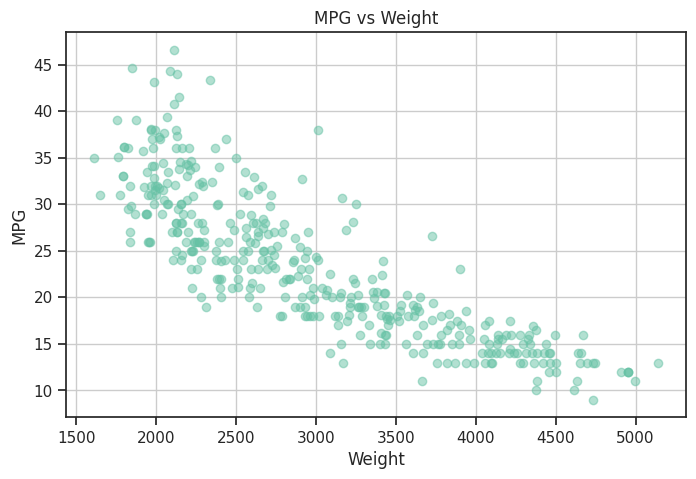

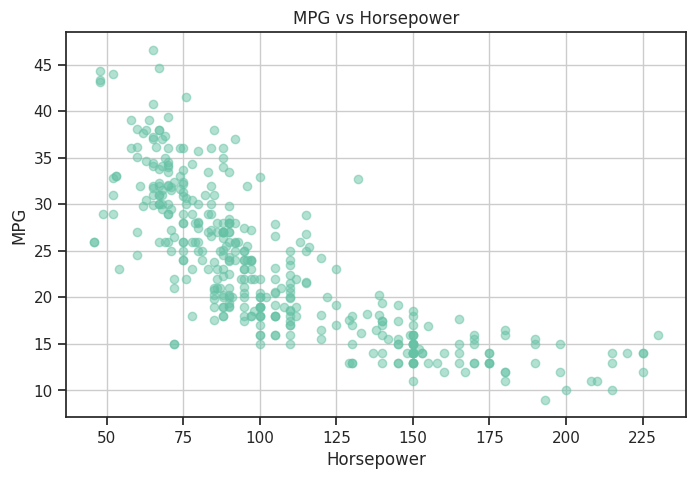

In [75]:
# Displacement vs MPG
plt.figure(figsize=(8, 5))
plt.scatter(data['displacement'], data['mpg'], alpha=0.5)
plt.title('MPG vs Displacement')
plt.xlabel('Displacement')
plt.ylabel('MPG')
plt.grid(True)
plt.show()

# Weight vs MPG
plt.figure(figsize=(8, 5))
plt.scatter(data['weight'], data['mpg'], alpha=0.5)
plt.title('MPG vs Weight')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.grid(True)
plt.show()

# Horsepower vs MPG
plt.figure(figsize=(8, 5))
plt.scatter(data['horsepower'], data['mpg'], alpha=0.5)
plt.title('MPG vs Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.grid(True)
plt.show()


*Enter your text here*

---------------------
### Hypotheses H4 and H5
At this point, we will formulate two hypotheses that should be confirmed or refuted based on the data:

- H4: fuel efficiency improved over the years represented in this dataset (i.e., 1970 through 1982).
- H5: Japanese cars (within the same time frame) are more fuel efficient than American or European ones.



### 2.3 Your turn! (20-26 points)

Write Python code to produce (box)plots that should provide good answers to the hypotheses H4 and H5 above (and some text to explain whether they were confirmed or not).

**Weight**: 20 pts, i.e., 10 pts per hypothesis.
Up to 6 bonus points for insightful additional hypotheses, code, and/or comments.

Hint:

``data['Country_code'] = data.origin.replace([1,2,3],['USA','Europe','Japan'])``



In [84]:
print(data.columns)

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model', 'origin', 'car_name', 'countryCode'],
      dtype='object')


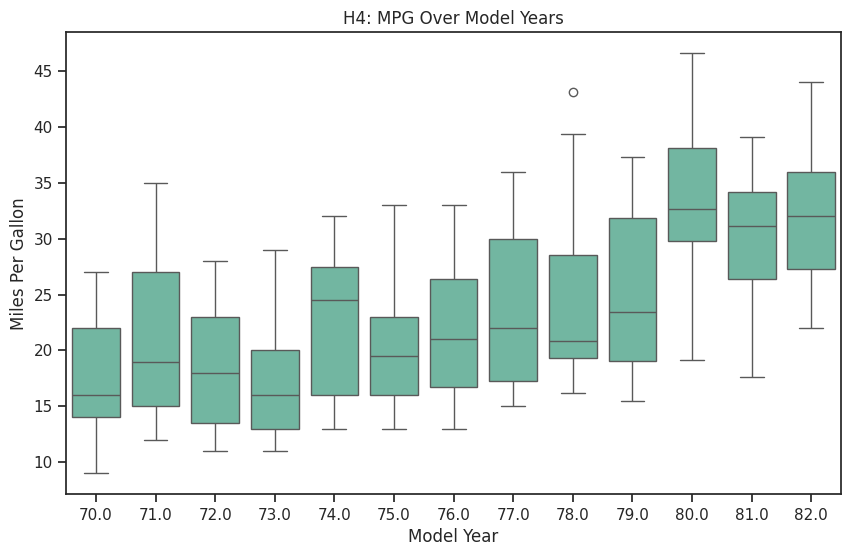

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

# H4 - MPG over time (yearly trend)
plt.figure(figsize=(10, 6))
sns.boxplot(x='model', y='mpg', data=data)
plt.title('H4: MPG Over Model Years')
plt.xlabel('Model Year')
plt.ylabel('Miles Per Gallon')
plt.show()


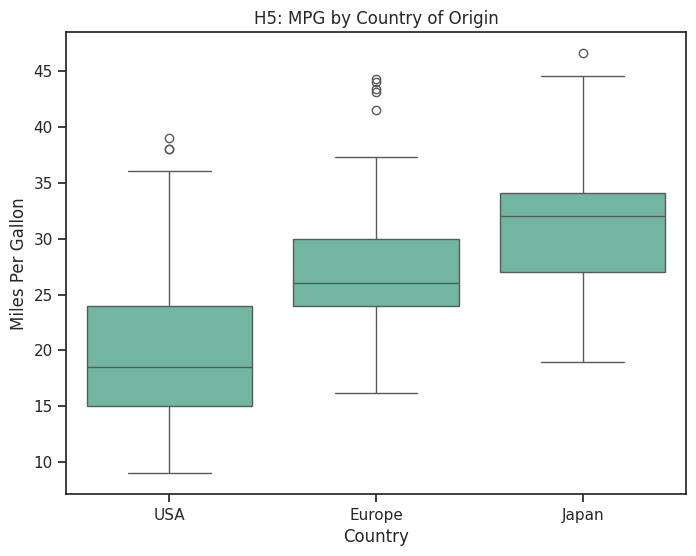

In [90]:
# H5 - MPG by country (origin)
data['countryCode'] = data['origin'].replace([1, 2, 3], ['USA', 'Europe', 'Japan'])

plt.figure(figsize=(8, 6))
sns.boxplot(x='countryCode', y='mpg', data=data)
plt.title('H5: MPG by Country of Origin')
plt.xlabel('Country')
plt.ylabel('Miles Per Gallon')
plt.show()


H4 Explanation:

The box plot shows that fuel efficiency (MPG) generally increases over the years, especially after 1975. This supports hypothesis H4 that cars became more fuel-efficient over time.

H5 Explanation:

The box plot shows that Japanese vehicles generally have higher MPG compared to American and European vehicles. This supports hypothesis H5 that Japanese cars were more fuel-efficient than American or European cars during the years included in this dataset.


### Conclusions (16 points)

Write your conclusions and make sure to address the issues below:
- What have you learned from this assignment?
- Which parts were the most fun, time-consuming, enlightening, tedious?
- What would you do if you had an additional week to work on this?

What have you learned from this assignment?
* From this assignment I learned to use as many resources available for my own benefit. I learned a bit about testing hypothesis and manipulating data.

Which parts were the most fun, time-consuming, enlightening, tedious?
* The most fun part was being able to write my own code and figuring things out through trial and error. But, it was also the most tedious and time-consuming.

What would you do if you had an additional week to work on this?
* I would spend more time thoroughly understanding the code and add more visulizations in the datasets.